In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [2]:
diamonds = pd.read_csv('/Users/christinasimbenga/Desktop/Diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data Wrangling 

In [10]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [12]:
diamonds.cut.value_counts() 

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [18]:
def reco(series):
    if series == "Ideal":
        return "0"
    if series == "Premium":
        return "1"
    if series == "Very Good":
        return "2"
    if series == "Good":
        return "3"
    if series == "Fair":
        return "4"
diamonds["cut1"]= diamonds["cut"].apply(reco)

In [19]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut1
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3


In [13]:
diamonds.color.value_counts() 

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [20]:
def reco(series):
    if series == "G":
        return "0"
    if series == "E":
        return "1"
    if series == "F":
        return "2"
    if series == "H":
        return "3"
    if series == "D":
        return "4"
    if series == "I":
        return "5"
    if series == "J":
        return "6"
diamonds["color1"]= diamonds["color"].apply(reco)

In [14]:
diamonds.clarity.value_counts() 

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [21]:
def reco(series):
    if series == "SI1":
        return "0"
    if series == "VS2":
        return "1"
    if series == "VS1":
        return "2"
    if series == "VVS2":
        return "3"
    if series == "VVS1":
        return "4"
    if series == "IF":
        return "5"
    if series == "I1":
        return "6"
diamonds["clarity1"]= diamonds["clarity"].apply(reco)

In [22]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut1,color1,clarity1
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,None
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1,0
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,1,2
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,5,1
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3,6,None


## Drop missing data 

In [23]:
diamonds.dropna(inplace=True)

In [24]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut1,color1,clarity1
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1,0
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,1,2
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,5,1
5,5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,6,3
6,6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2,5,4


## dropping unwanted columns

In [28]:
diamonds.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

In [29]:
diamonds.head ()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut1,color1,clarity1
1,1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,1,0
2,2,0.23,56.9,65.0,327,4.05,4.07,2.31,3,1,2
3,3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,5,1
5,5,0.24,62.8,57.0,336,3.94,3.96,2.48,2,6,3
6,6,0.24,62.3,57.0,336,3.95,3.98,2.47,2,5,4


In [30]:
x = diamonds[['carat','cut1', 'color1','clarity1']]                          

In [31]:
y = diamonds['price']

# Train Test Split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [33]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(26847, 4) (26847,)
(17899, 4) (17899,)


# Linear Regression Model

In [34]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [35]:
predictions = lm.predict(x_test)
predictions

array([2917.84333287, 6292.40623413, 9992.99949562, ..., 6909.74568676,
       2609.44811059, 6043.14812683])

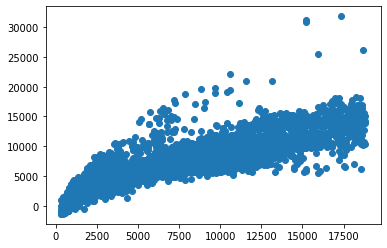

In [36]:
plt.scatter(y_test, predictions)

Looking at it looks as if most data points are gathered in a very dense line with some outliers hanging out somewhere 

# Accuracy Score

In [37]:
print("Score:", lm.score(x_test, y_test))

Score: 0.8698409793699033


model is accurate approximately 87% of the time, which is really good 

# Examining Error

## Mean Absolute Error (MAE)

In [38]:
metrics.mean_absolute_error(y_test, predictions)

897.8908431686093

that is very bad theres seems to be a lot of error here as it should be closer to 0 

## Mean Squared Error (MSE)

In [39]:
metrics.mean_squared_error(y_test, predictions)

2008505.0955370746

takes into account large amounts of error, which often happens in the real world and it looks bad 

## Root Mean Squared Error (RMSE)

In [40]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1417.2173776584432

again the errors show this is not a good model as the errors should be lower and close to 0 for a good model 

# k-Fold Cross Validation

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [43]:
kfold = KFold(n_splits= 5, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     2 ... 44743 44744 44745], test: [    3     8    10 ... 44735 44741 44742]
train: [    0     1     3 ... 44742 44744 44745], test: [    2    11    19 ... 44731 44740 44743]
train: [    1     2     3 ... 44743 44744 44745], test: [    0     4     6 ... 44726 44736 44738]
train: [    0     2     3 ... 44743 44744 44745], test: [    1     5    12 ... 44718 44721 44739]
train: [    0     1     2 ... 44741 44742 44743], test: [    9    14    15 ... 44737 44744 44745]


In [46]:
print(cross_val_score(lm, x,y, cv=3))

[ 0.25146969  0.77416645 -1.073922  ]


Looks like the first trained model was accurate 25% of the time, while the second model was accurate 77% of the time and the third model was accurate -1.07% of the time. Second model looks promising, but its not best either set of data or algorithms are off. 

# Thank you :) 